In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import math 

## BMI Data

In [2]:
data = pd.read_csv('Data/NHANES.csv')
adult = data[data['Age']>=18]
white = adult[adult['Race1'] == 'White']
black = adult[adult['Race1']=='Black']
whiteBMI = white['BMI'].dropna()
blackBMI = black['BMI'].dropna()

C:\Users\daiki\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


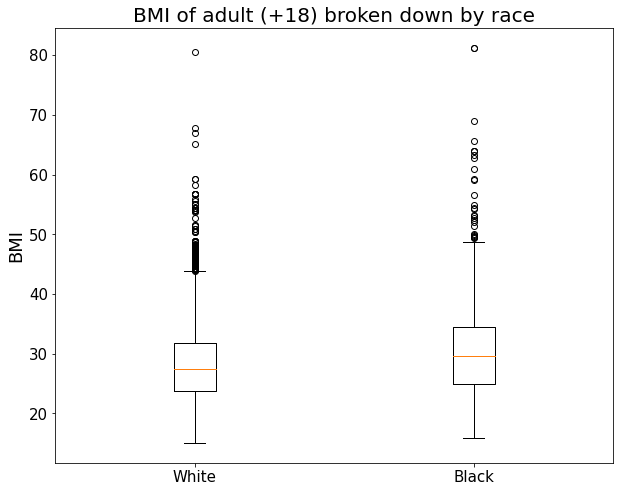

In [3]:
fig, axs = plt.subplots(figsize=(10,8))
axs.boxplot([whiteBMI,blackBMI])
plt.title('BMI of adult (+18) broken down by race', fontsize=20)
axs.set_xticklabels(['White', 'Black'])
axs.set_ylabel('BMI', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


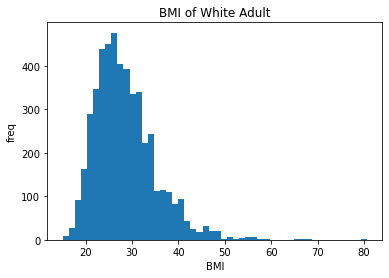

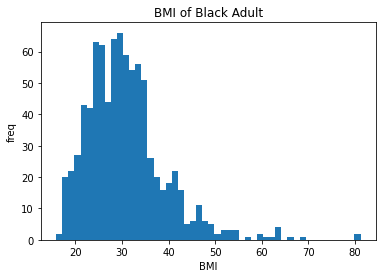

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(whiteBMI, bins=50)
ax.set_title('BMI of White Adult')
ax.set_xlabel('BMI')
ax.set_ylabel('freq')
fig.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(blackBMI, bins=50)
ax.set_title('BMI of Black Adult')
ax.set_xlabel('BMI')
ax.set_ylabel('freq')
fig.show()

In [5]:
from tabulate import tabulate

print(tabulate([['White', np.mean(whiteBMI), np.std(whiteBMI)], ['Black', np.mean(blackBMI),np.std(blackBMI)]],
               headers=['Race', 'Mean BMI', 'Standard Deviation']))

Race      Mean BMI    Standard Deviation
------  ----------  --------------------
White      28.4539               6.49116
Black      30.7703               8.47851


In [8]:
t_val, p_val = ttest_ind(whiteBMI, blackBMI, equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: -7.587284970757366
p-value: 7.304600961973312e-14


In [9]:
n1 = whiteBMI.shape[0]
n2 = blackBMI.shape[0]

white_mean = np.mean(whiteBMI)
black_mean = np.mean(blackBMI)
white_sd = np.std(whiteBMI)
black_sd = np.std(blackBMI)

low_ci_bound = (black_mean - white_mean) - 1.96*(
    math.sqrt((white_sd**2)/n1 + (black_sd**2)/n2))
high_ci_bound = (black_mean - white_mean) + 1.96*(
    math.sqrt((white_sd**2)/n1 + (black_sd**2)/n2))

mean_diff_ci = [low_ci_bound, high_ci_bound]
print("95% CI:", mean_diff_ci)
print("Mean difference: ", black_mean-white_mean)

95% CI: [1.7183852842947842, 2.9145451935197912]
Mean difference:  2.3164652389072877
